In [1]:
import numpy as np
import matplotlib.pyplot as plt
################ Basic version of logistic regression ################
## Sigmoid function to calculate z = X*beta and p = y_pred = 1/(1+exp(-X*beta))

## Loss function: Minimization of the negative log-likelihood (Maximization of the loglikelihood)
 
## Loss function: L(w,b) = -1/m * summation { y(x_i)*log(y_pred(x_i)) + (1-y(x_i))*log(1-y_pred(x_i)) }

## fit function that applies gradient descent approach

## Gradients with respect to coeffients: dL/dw = 1/m * X'*(y_pred - y) [X: matrix, y: column vector]

## Gradient with respect to the bias term: dL/db = 1/m * summation {y_pred(x_i) - y(x_i)}

## Prediction for probabilities y_pred(x_i) and labels y_pred_label(x_i)

## Evaluations for accuracy on training or testing dataset
#######################################################################

class LogisticRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0
        
        # Gradient descent
        for epoch in range(self.epochs):
            print(f"\rEpoch {epoch+1}- ", end="", flush=True)
            linear_model = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(linear_model)
            
            # Compute gradients
            dw = (1 / num_samples) * np.dot(X.T, (predictions - y))
            db = (1 / num_samples) * np.sum(predictions - y)
            
            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            self.evaluate(X,y)
    
    # Label prediction
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_model)
        class_predictions = [1 if i > 0.5 else 0 for i in y_pred]
        return class_predictions
    
    # Probability prediction
    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_model)
        return y_pred
    
    # Evaluation for training or testing dataset (requires knowing y_test)
    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test) # Labels
        accuracy = np.mean(y_pred == y_test)
        print(f'Model Accuracy: {accuracy * 100:.2f}%')
        return accuracy

In [2]:
################## Dataset Description ################### 

## Name: MNIST DATASET with MULTI-LABELS for digits

## Training data: 60,000 training images noted by X_train

## Image size: 28x28 and can be flattened into a vector of 784,1

## Training Labels: 60,000 single column label with the true target label (0,1,2,3...,9)

## Testing data: 10,000 images

## Testing label: 10,000 single column label with a true target label (0,1,2,3,...,9)

## Testing labels are assumed hidden for evaluation purposes

##########################################################

import tensorflow as tf

# Load dataset
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data: flatten the images and scale to [0, 1]
X_train = X_train.reshape((X_train.shape[0], -1)).astype(np.float32) / 255.
X_test = X_test.reshape((X_test.shape[0], -1)).astype(np.float32) / 255.



########### Run logistic regression 1 vs rest #############
## 0 vs rest .. label 0 is defined by 1 and all other labels by 0
## 1 vs rest .. label 1 is defined by 1 and all other labels by 0
## ....
## 9 vs rest .. label 9 is defined by 1 and all other labels by 0
## We moved from one dataset into 10 different datasets with same X_train but different y_train
###########################################################

# Create a binary classification problem: "0" or "not 0"
y_train_0 = np.where(y_train == 0, 1, 0)
y_test_0 = np.where(y_test == 0, 1, 0)


# Create a binary classification problem: "1" or "not 1"
y_train_1 = np.where(y_train == 1, 1, 0)
y_test_1 = np.where(y_test == 1, 1, 0)

# Create a binary classification problem: "2" or "not 2"
y_train_2 = np.where(y_train == 2, 1, 0)
y_test_2 = np.where(y_test == 2, 1, 0)

# Create a binary classification problem: "3" or "not 3"
y_train_3 = np.where(y_train == 3, 1, 0)
y_test_3 = np.where(y_test == 3, 1, 0)

# Create a binary classification problem: "4" or "not 4"
y_train_4 = np.where(y_train == 4, 1, 0)
y_test_4 = np.where(y_test == 4, 1, 0)

# Create a binary classification problem: "5" or "not 5"
y_train_5 = np.where(y_train == 5, 1, 0)
y_test_5 = np.where(y_test == 5, 1, 0)

# Create a binary classification problem: "6" or "not 6"
y_train_6 = np.where(y_train == 6, 1, 0)
y_test_6 = np.where(y_test == 6, 1, 0)

# Create a binary classification problem: "7" or "not 7"
y_train_7 = np.where(y_train == 7, 1, 0)
y_test_7 = np.where(y_test == 7, 1, 0)

# Create a binary classification problem: "8" or "not 8"
y_train_8 = np.where(y_train == 8, 1, 0)
y_test_8 = np.where(y_test == 8, 1, 0)

# Create a binary classification problem: "9" or "not 9"
y_train_9 = np.where(y_train == 9, 1, 0)
y_test_9 = np.where(y_test == 9, 1, 0)

In [3]:
############ Develop 10 logistic regression models ############
## model_0 to predict if the digit is 0 or not 0
## model_1 to predict if the digit is 1 or not 1
## model_2 to predict if the digit is 2 or not 2
## ...
## model_9 to predict if the digit is 9 or not 9
###############################################################

print("######### Model 0 ##########")
model_0 = LogisticRegression(epochs=10)
model_0.fit(X_train, y_train_0)

print("######### Model 1 ##########")
model_1 = LogisticRegression(epochs=10)
model_1.fit(X_train, y_train_1)

print("######### Model 2 ##########")
model_2 = LogisticRegression(epochs=10)
model_2.fit(X_train, y_train_2)

print("######### Model 3 ##########")
model_3 = LogisticRegression(epochs=10)
model_3.fit(X_train, y_train_3)

print("######### Model 4 ##########")
model_4 = LogisticRegression(epochs=10)
model_4.fit(X_train, y_train_4)

print("######### Model 5 ##########")
model_5 = LogisticRegression(epochs=10)
model_5.fit(X_train, y_train_5)

print("######### Model 6 ##########")
model_6 = LogisticRegression(epochs=10)
model_6.fit(X_train, y_train_6)

print("######### Model 7 ##########")
model_7 = LogisticRegression(epochs=10)
model_7.fit(X_train, y_train_7)

print("######### Model 8 ##########")
model_8 = LogisticRegression(epochs=10)
model_8.fit(X_train, y_train_8)

print("######### Model 9 ##########")
model_9 = LogisticRegression(epochs=10)
model_9.fit(X_train, y_train_9)

######### Model 0 ##########
Epoch 1- Model Accuracy: 90.13%
Epoch 2- Model Accuracy: 90.13%
Epoch 3- Model Accuracy: 90.13%
Epoch 4- Model Accuracy: 90.13%
Epoch 5- Model Accuracy: 90.13%
Epoch 6- Model Accuracy: 90.13%
Epoch 7- Model Accuracy: 90.13%
Epoch 8- Model Accuracy: 90.13%
Epoch 9- Model Accuracy: 90.13%
Epoch 10- Model Accuracy: 90.13%
######### Model 1 ##########
Epoch 1- Model Accuracy: 88.76%
Epoch 2- Model Accuracy: 88.76%
Epoch 3- Model Accuracy: 88.76%
Epoch 4- Model Accuracy: 88.76%
Epoch 5- Model Accuracy: 88.76%
Epoch 6- Model Accuracy: 88.76%
Epoch 7- Model Accuracy: 88.76%
Epoch 8- Model Accuracy: 88.76%
Epoch 9- Model Accuracy: 88.76%
Epoch 10- Model Accuracy: 88.76%
######### Model 2 ##########
Epoch 1- Model Accuracy: 90.07%
Epoch 2- Model Accuracy: 90.07%
Epoch 3- Model Accuracy: 90.07%
Epoch 4- Model Accuracy: 90.07%
Epoch 5- Model Accuracy: 90.07%
Epoch 6- Model Accuracy: 90.07%
Epoch 7- Model Accuracy: 90.07%
Epoch 8- Model Accuracy: 90.07%
Epoch 9- Model 

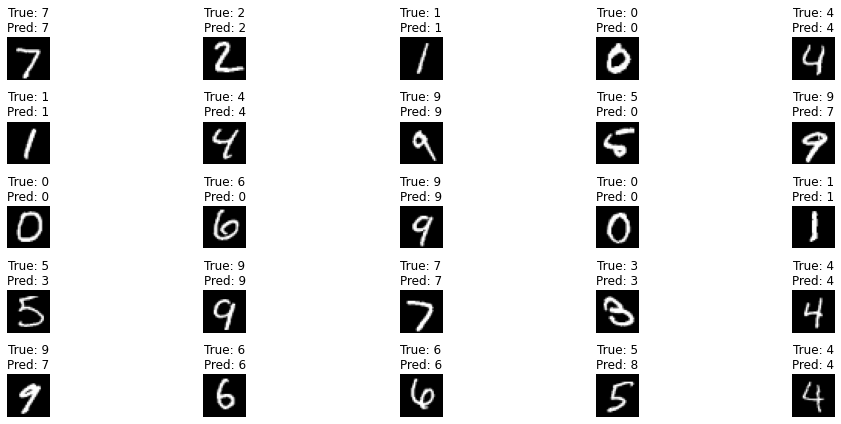

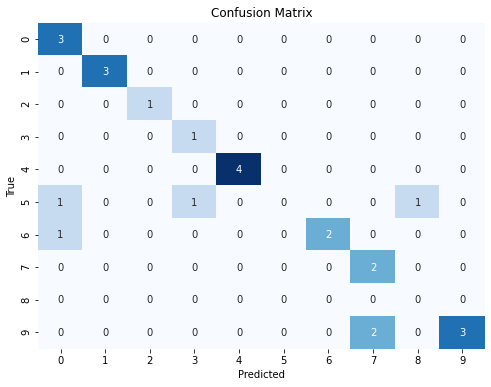

In [4]:
import seaborn as sns
# Misc function to plot 25 images and compare true vs predicted labels
def plot_images(images, true_labels, predicted_labels, nrows=5, ncols=5):
    """
    Plots images along with their true and predicted labels.

    images: Array of image data.
    true_labels: Array of true labels.
    predicted_labels: Array of predicted labels.
    nrows: Number of rows in the subplot grid.
    ncols: Number of columns in the subplot grid.
    """
    fig, axes = plt.subplots(nrows, ncols, figsize=(15, 6))
    for i, ax in enumerate(axes.flatten()):
        img_2d = images[i].reshape((28, 28))
        ax.imshow(img_2d, cmap='gray')
        ax.set_title(f"True: {true_labels[i]}\nPred: {predicted_labels[i]}", fontsize=12)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


# Misc function to plot the confusion matrix
def confusion_matrix(true_labels, predicted_labels, classes):
    """
    Calculate and plot the confusion matrix.

    true_labels: Actual labels
    predicted_labels: Predicted labels
    classes: List of unique class labels
    """
    num_classes = len(classes)
    cm = np.zeros((num_classes, num_classes), dtype=int)
    
    for true, pred in zip(true_labels, predicted_labels):
        cm[true, pred] += 1
    
    # Plotting
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False,
                xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()
    
    
# Example usage:
# Select first 25 images
images = X_test[:25,:]
true_labels = y_test[:25]

###### Make individual predictions ######
## Predict probability it is 0, 1, ..., 9
## Classify the label based on the maximum of the probabilities
#########################################
y_pred_0 = model_0.predict_proba(images)
y_pred_1 = model_1.predict_proba(images)
y_pred_2 = model_2.predict_proba(images)
y_pred_3 = model_3.predict_proba(images)
y_pred_4 = model_4.predict_proba(images)
y_pred_5 = model_5.predict_proba(images)
y_pred_6 = model_6.predict_proba(images)
y_pred_7 = model_7.predict_proba(images)
y_pred_8 = model_8.predict_proba(images)
y_pred_9 = model_9.predict_proba(images)

Y_pred = np.array([y_pred_0,y_pred_1,y_pred_2,y_pred_3,y_pred_4,y_pred_5,y_pred_6,y_pred_7,y_pred_8,y_pred_9])
predicted_labels = np.argmax(Y_pred,axis=0)

## Make the plots
plot_images(images, true_labels, predicted_labels)

## confusion matrix
labels = [0,1,2,3,4,5,6,7,8,9]
confusion_matrix(true_labels, predicted_labels, labels)

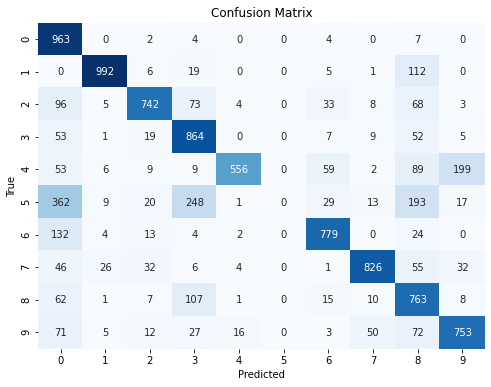

In [5]:
###### Make individual predictions ######
## Predict probability it is 0, 1, ..., 9
## Classify the label based on the maximum of the probabilities
#########################################
y_pred_0 = model_0.predict_proba(X_test)
y_pred_1 = model_1.predict_proba(X_test)
y_pred_2 = model_2.predict_proba(X_test)
y_pred_3 = model_3.predict_proba(X_test)
y_pred_4 = model_4.predict_proba(X_test)
y_pred_5 = model_5.predict_proba(X_test)
y_pred_6 = model_6.predict_proba(X_test)
y_pred_7 = model_7.predict_proba(X_test)
y_pred_8 = model_8.predict_proba(X_test)
y_pred_9 = model_9.predict_proba(X_test)

Y_pred = np.array([y_pred_0,y_pred_1,y_pred_2,y_pred_3,y_pred_4,y_pred_5,y_pred_6,y_pred_7,y_pred_8,y_pred_9])
predicted_labels = np.argmax(Y_pred,axis=0)

## confusion matrix
labels = [0,1,2,3,4,5,6,7,8,9]
confusion_matrix(y_test, predicted_labels, labels)

In [6]:
################ More comprehensive version of logistic regression ################
## Normalization included
##
## L1:Lasso and L2:Ridge regularization included
##
## SGD optimizer included with mini-batch (faster and more robust conversion)
##
## ADAM optimizer included with mini-batch (heuristically more robust)
##
## Identification of significant variables based on coefficients (heuristic)
##
## Plot the ROC curve
###################################################################################

import numpy as np
import matplotlib.pyplot as plt

class LogisticRegression:
    def __init__(self, learning_rate=0.01, epochs=1000, normalize=False):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.normalize = normalize
        self.mean = None
        self.std = None
        
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    # Normalization
    def _normalize(self, X):
        if self.mean is None or self.std is None:
            self.mean = np.mean(X, axis=0)
            self.std = np.std(X, axis=0)
        return (X - self.mean) / (self.std + 1e-10)  # added epsilon to avoid division by zero
    
    
    def fit(self, X, y, regularization=None, lambda_=0.1):
        
        if self.normalize:
            X = self._normalize(X)
            
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0
        
        # Gradient descent
        for epoch in range(self.epochs):
            print(f"\rEpoch {epoch+1}- ", end="", flush=True)
            linear_model = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(linear_model)
            
            # Compute gradients
            dw = (1 / num_samples) * np.dot(X.T, (predictions - y))
            db = (1 / num_samples) * np.sum(predictions - y)
            
            # Regularization
            if regularization == 'l2':
                dw += lambda_ * self.weights  # Adding L2 regularization term
                db += lambda_ * self.bias  # Adding L2 regularization term
            elif regularization == 'l1':
                dw += lambda_ * np.sign(self.weights)  # Adding L1 regularization term
                db += lambda_ * np.sign(self.bias)  # Adding L1 regularization term
                
            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            self.evaluate(X,y)
            
    
    def fit_sgd(self, X, y, batch_size=1, regularization=None, lambda_=0.1):
        if self.normalize:
            X = self._normalize(X)
            
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0
        
        # Stochastic gradient descent
        for epoch in range(self.epochs):
            print(f"\rEpoch {epoch+1}- ", end="", flush=True)
            indices = np.random.permutation(num_samples)
            X_shuffled = X[indices]
            y_shuffled = y[indices]
            
            for i in range(0, num_samples, batch_size):
                xi = X_shuffled[i:i+batch_size]
                yi = y_shuffled[i:i+batch_size]
                
                linear_model = np.dot(xi, self.weights) + self.bias
                predictions = self.sigmoid(linear_model)
                
                # Compute gradients
                dw = np.dot(xi.T, (predictions - yi))
                db = np.sum(predictions - yi)
                
                # Regularization
                if regularization == 'l2':
                    dw += lambda_ * self.weights  # Adding L2 regularization term
                    db += lambda_ * self.bias  # Adding L2 regularization term
                elif regularization == 'l1':
                    dw += lambda_ * np.sign(self.weights)  # Adding L1 regularization term
                    db += lambda_ * np.sign(self.bias)  # Adding L1 regularization term
                
                # Update parameters
                self.weights -= self.learning_rate * dw
                self.bias -= self.learning_rate * db
            
            self.evaluate(X,y)
    
    def fit_adam(self, X, y, batch_size=1, beta1=0.9, beta2=0.999, epsilon=1e-8, regularization=None, lambda_=0.1):
        if self.normalize:
            X = self._normalize(X)
            
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0
        
        m_w, v_w = np.zeros_like(self.weights), np.zeros_like(self.weights)
        m_b, v_b = 0, 0
        t = 0
        
        # Adam optimization
        for epoch in range(self.epochs):
            print(f"\rEpoch {epoch+1}- ", end="", flush=True)
            indices = np.random.permutation(num_samples)
            X_shuffled = X[indices]
            y_shuffled = y[indices]
            
            for i in range(0, num_samples, batch_size):
                xi = X_shuffled[i:i+batch_size]
                yi = y_shuffled[i:i+batch_size]
                
                linear_model = np.dot(xi, self.weights) + self.bias
                predictions = self.sigmoid(linear_model)
                
                # Compute gradients
                dw = np.dot(xi.T, (predictions - yi)) / batch_size
                db = np.sum(predictions - yi) / batch_size
                
                # Regularization
                if regularization == 'l2':
                    dw += lambda_ * self.weights  # Adding L2 regularization term
                    db += lambda_ * self.bias  # Adding L2 regularization term
                elif regularization == 'l1':
                    dw += lambda_ * np.sign(self.weights)  # Adding L1 regularization term
                    db += lambda_ * np.sign(self.bias)  # Adding L1 regularization term
                
                # Update biased first and second moment estimates for weights
                m_w = beta1 * m_w + (1 - beta1) * dw
                v_w = beta2 * v_w + (1 - beta2) * dw**2
                  
                # Update biased first and second moment estimates for bias
                m_b = beta1 * m_b + (1 - beta1) * db
                v_b = beta2 * v_b + (1 - beta2) * db**2
                
                # Compute bias-corrected moment estimates
                m_w_hat = m_w / (1 - beta1**(t+1))
                v_w_hat = v_w / (1 - beta2**(t+1))
                
                m_b_hat = m_b / (1 - beta1**(t+1))
                v_b_hat = v_b / (1 - beta2**(t+1))
                
                # Update parameters
                self.weights -= self.learning_rate * m_w_hat / (np.sqrt(v_w_hat) + epsilon)
                self.bias -= self.learning_rate * m_b_hat / (np.sqrt(v_b_hat) + epsilon)

                t += 1
                
            self.evaluate(X,y)
    
    def predict(self, X):
        if self.normalize:
            X = self._normalize(X)
            
        linear_model = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(linear_model)
        class_predictions = [1 if i > 0.5 else 0 for i in predictions]
        return class_predictions
    
    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(linear_model)
        return predictions
    
    def evaluate(self, X_test, y_test):
        if self.normalize:
            X_test = self._normalize(X_test)
        predictions = self.predict(X_test)
        accuracy = np.mean(predictions == y_test)
        print(f'Model Accuracy: {accuracy * 100:.2f}%')
        return accuracy
    
    def significant_vars(self, threshold):
        significant_indices = np.where(abs(self.weights) >= threshold)[0]
        print(f'Significant variables (index): {significant_indices}')
        return significant_indices
    
    def plot_roc_curve(self, X, y_true):
        """
        Plot ROC curve.

        X: The input features
        y_true: True labels
        """
        
        if self.normalize:
            X = self._normalize(X)
        
        # Assuming predict_proba is a method in your class that predicts the probability 
        # of the positive class
        y_score = self.predict_proba(X) 

        thresholds = np.linspace(1, 0, 100)
        tpr = []  # True Positive Rate
        fpr = []  # False Positive Rate

        for thresh in thresholds:
            y_pred = (y_score > thresh).astype(int)
            tp = np.sum((y_pred == 1) & (y_true == 1))
            fp = np.sum((y_pred == 1) & (y_true == 0))
            fn = np.sum((y_pred == 0) & (y_true == 1))
            tn = np.sum((y_pred == 0) & (y_true == 0))
            
            tpr.append(tp / (tp + fn))
            fpr.append(fp / (fp + tn))
        
        # Calculating AUC using the trapezoidal rule
        auc = np.trapz(tpr, x=fpr)
        
        # Plotting the ROC curve
        plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.5f})')
        plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend()
        plt.grid(True)
        plt.show()
    

In [7]:
############ Develop 10 logistic regression models for mnist dataset ############
## model_0 to predict if the digit is 0 or not 0
## model_1 to predict if the digit is 1 or not 1
## model_2 to predict if the digit is 2 or not 2
## ...
## model_9 to predict if the digit is 9 or not 9
#################################################################################

print("######### Model 0 ##########")
model_0 = LogisticRegression(epochs=10,normalize=False)
model_0.fit_sgd(X_train, y_train_0, regularization='l1', lambda_=.001, batch_size=32)

print("######### Model 1 ##########")
model_1 = LogisticRegression(epochs=10,normalize=False)
model_1.fit_sgd(X_train, y_train_1, regularization='l1', lambda_=.001, batch_size=32)

print("######### Model 2 ##########")
model_2 = LogisticRegression(epochs=10,normalize=False)
model_2.fit_sgd(X_train, y_train_2, regularization='l1', lambda_=.001, batch_size=32)

print("######### Model 3 ##########")
model_3 = LogisticRegression(epochs=10,normalize=False)
model_3.fit_sgd(X_train, y_train_3, regularization='l1', lambda_=.001, batch_size=32)

print("######### Model 4 ##########")
model_4 = LogisticRegression(epochs=10,normalize=False)
model_4.fit_sgd(X_train, y_train_4, regularization='l1', lambda_=.001, batch_size=32)

print("######### Model 5 ##########")
model_5 = LogisticRegression(epochs=10,normalize=False)
model_5.fit_sgd(X_train, y_train_5, regularization='l1', lambda_=.001, batch_size=32)

print("######### Model 6 ##########")
model_6 = LogisticRegression(epochs=10,normalize=False)
model_6.fit_sgd(X_train, y_train_6, regularization='l1', lambda_=.001, batch_size=32)

print("######### Model 7 ##########")
model_7 = LogisticRegression(epochs=10,normalize=False)
model_7.fit_sgd(X_train, y_train_7, regularization='l1', lambda_=.001, batch_size=32)

print("######### Model 8 ##########")
model_8 = LogisticRegression(epochs=10,normalize=False)
model_8.fit_sgd(X_train, y_train_8, regularization='l1', lambda_=.001, batch_size=32)

print("######### Model 9 ##########")
model_9 = LogisticRegression(epochs=10,normalize=False)
model_9.fit_adam(X_train, y_train_9, regularization='l1', lambda_=.001, batch_size=32)

######### Model 0 ##########
Epoch 1- Model Accuracy: 99.12%
Epoch 2- Model Accuracy: 99.13%
Epoch 3- Model Accuracy: 99.23%
Epoch 4- Model Accuracy: 99.23%
Epoch 5- Model Accuracy: 99.27%
Epoch 6- Model Accuracy: 99.19%
Epoch 7- Model Accuracy: 99.26%
Epoch 8- Model Accuracy: 99.27%
Epoch 9- Model Accuracy: 99.28%
Epoch 10- Model Accuracy: 99.27%
######### Model 1 ##########
Epoch 1- Model Accuracy: 99.11%
Epoch 2- Model Accuracy: 99.13%
Epoch 3- Model Accuracy: 99.11%
Epoch 4- Model Accuracy: 99.20%
Epoch 5- Model Accuracy: 99.17%
Epoch 6- Model Accuracy: 99.26%
Epoch 7- Model Accuracy: 99.27%
Epoch 8- Model Accuracy: 99.23%
Epoch 9- Model Accuracy: 99.25%
Epoch 10- Model Accuracy: 99.09%
######### Model 2 ##########
Epoch 1- Model Accuracy: 97.71%
Epoch 2- Model Accuracy: 97.82%
Epoch 3- Model Accuracy: 98.01%
Epoch 4- Model Accuracy: 97.91%
Epoch 5- Model Accuracy: 97.97%
Epoch 6- Model Accuracy: 97.98%
Epoch 7- Model Accuracy: 98.04%
Epoch 8- Model Accuracy: 97.98%
Epoch 9- Model 

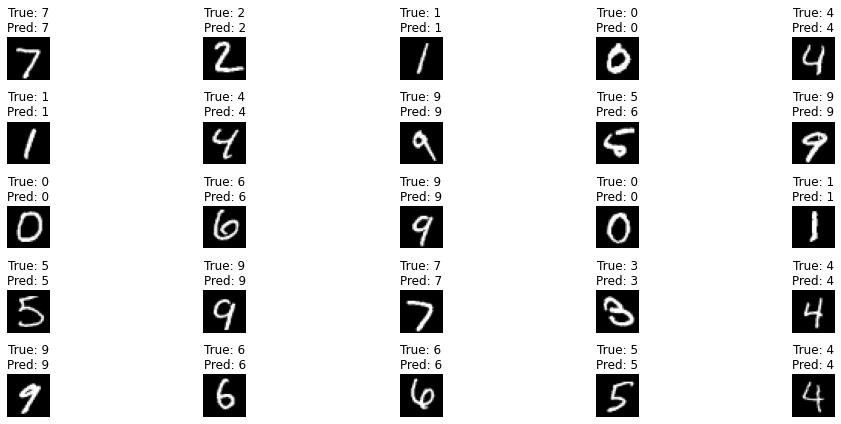

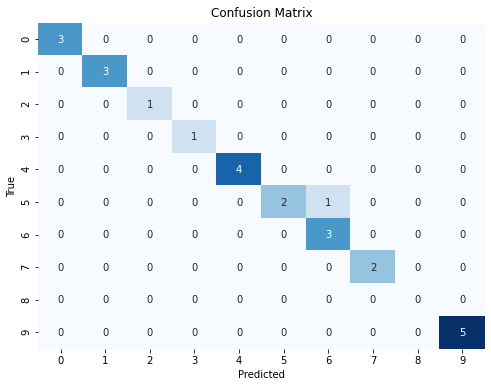

In [8]:
import seaborn as sns
# Misc function to plot 25 images and compare true vs predicted labels
def plot_images(images, true_labels, predicted_labels, nrows=5, ncols=5):
    """
    Plots images along with their true and predicted labels.

    images: Array of image data.
    true_labels: Array of true labels.
    predicted_labels: Array of predicted labels.
    nrows: Number of rows in the subplot grid.
    ncols: Number of columns in the subplot grid.
    """
    fig, axes = plt.subplots(nrows, ncols, figsize=(15, 6))
    for i, ax in enumerate(axes.flatten()):
        img_2d = images[i].reshape((28, 28))
        ax.imshow(img_2d, cmap='gray')
        ax.set_title(f"True: {true_labels[i]}\nPred: {predicted_labels[i]}", fontsize=12)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


# Misc function to plot the confusion matrix
def confusion_matrix(true_labels, predicted_labels, classes):
    """
    Calculate and plot the confusion matrix.

    true_labels: Actual labels
    predicted_labels: Predicted labels
    classes: List of unique class labels
    """
    num_classes = len(classes)
    cm = np.zeros((num_classes, num_classes), dtype=int)
    
    for true, pred in zip(true_labels, predicted_labels):
        cm[true, pred] += 1
    
    # Plotting
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False,
                xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()
    
    
# Example usage:
# Select first 25 images
images = X_test[:25,:]
true_labels = y_test[:25]

###### Make individual predictions ######
## Predict probability it is 0, 1, ..., 9
## Classify the label based on the maximum of the probabilities
#########################################
y_pred_0 = model_0.predict_proba(images)
y_pred_1 = model_1.predict_proba(images)
y_pred_2 = model_2.predict_proba(images)
y_pred_3 = model_3.predict_proba(images)
y_pred_4 = model_4.predict_proba(images)
y_pred_5 = model_5.predict_proba(images)
y_pred_6 = model_6.predict_proba(images)
y_pred_7 = model_7.predict_proba(images)
y_pred_8 = model_8.predict_proba(images)
y_pred_9 = model_9.predict_proba(images)

Y_pred = np.array([y_pred_0,y_pred_1,y_pred_2,y_pred_3,y_pred_4,y_pred_5,y_pred_6,y_pred_7,y_pred_8,y_pred_9])
predicted_labels = np.argmax(Y_pred,axis=0)

## Make the plots
plot_images(images, true_labels, predicted_labels)

## confusion matrix
labels = [0,1,2,3,4,5,6,7,8,9]
confusion_matrix(true_labels, predicted_labels, labels)

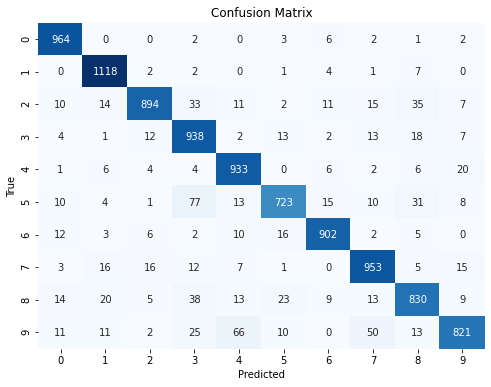

In [9]:
###### Make individual predictions ######
## Predict probability it is 0, 1, ..., 9
## Classify the label based on the maximum of the probabilities
#########################################
y_pred_0 = model_0.predict_proba(X_test)
y_pred_1 = model_1.predict_proba(X_test)
y_pred_2 = model_2.predict_proba(X_test)
y_pred_3 = model_3.predict_proba(X_test)
y_pred_4 = model_4.predict_proba(X_test)
y_pred_5 = model_5.predict_proba(X_test)
y_pred_6 = model_6.predict_proba(X_test)
y_pred_7 = model_7.predict_proba(X_test)
y_pred_8 = model_8.predict_proba(X_test)
y_pred_9 = model_9.predict_proba(X_test)

Y_pred = np.array([y_pred_0,y_pred_1,y_pred_2,y_pred_3,y_pred_4,y_pred_5,y_pred_6,y_pred_7,y_pred_8,y_pred_9])
predicted_labels = np.argmax(Y_pred,axis=0)

## confusion matrix
labels = [0,1,2,3,4,5,6,7,8,9]
confusion_matrix(y_test, predicted_labels, labels)

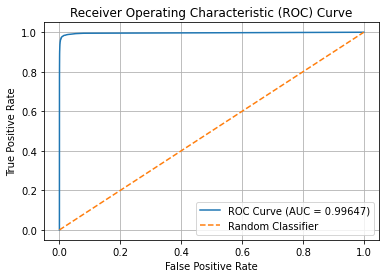

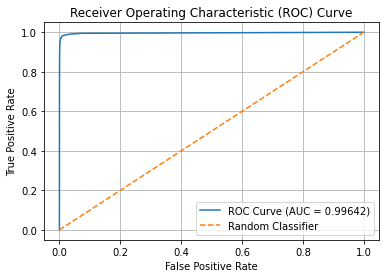

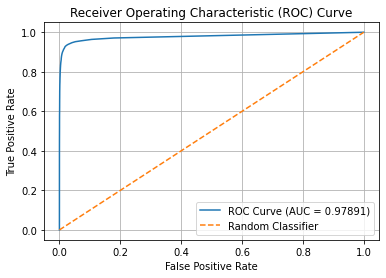

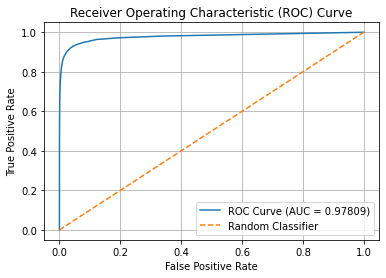

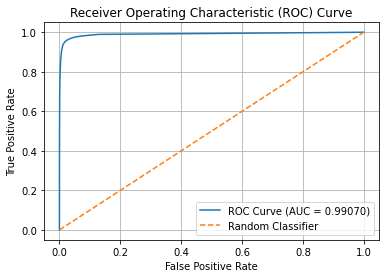

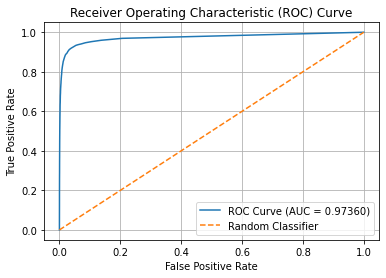

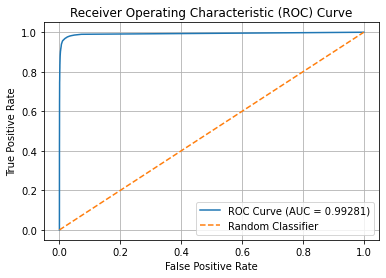

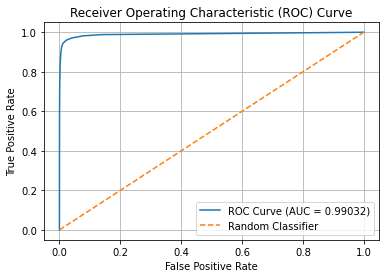

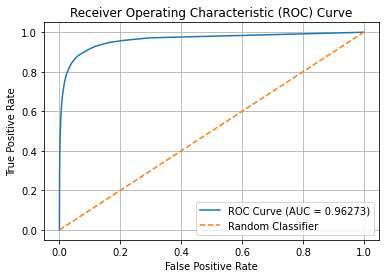

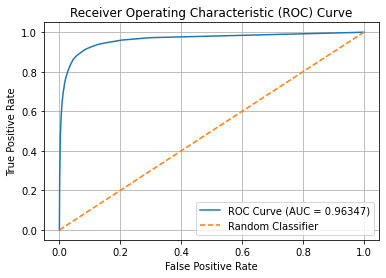

In [10]:
######### Run individual ROC curves for each of the 10 logistic regression models ##########
##
## ROC curves are only for binary classification
##
## Training ROC curves
##
############################################################################################

## ROC curve for 0 vs the rest
model_0.plot_roc_curve(X_train,y_train_0)

## ROC curve for 1 vs the rest
model_1.plot_roc_curve(X_train,y_train_1)

## ROC curve for 2 vs the rest
model_2.plot_roc_curve(X_train,y_train_2)

## ROC curve for 3 vs the rest
model_3.plot_roc_curve(X_train,y_train_3)

## ROC curve for 4 vs the rest
model_4.plot_roc_curve(X_train,y_train_4)

## ROC curve for 5 vs the rest
model_5.plot_roc_curve(X_train,y_train_5)

## ROC curve for 6 vs the rest
model_6.plot_roc_curve(X_train,y_train_6)

## ROC curve for 7 vs the rest
model_7.plot_roc_curve(X_train,y_train_7)

## ROC curve for 8 vs the rest
model_8.plot_roc_curve(X_train,y_train_8)

## ROC curve for 9 vs the rest
model_9.plot_roc_curve(X_train,y_train_9)


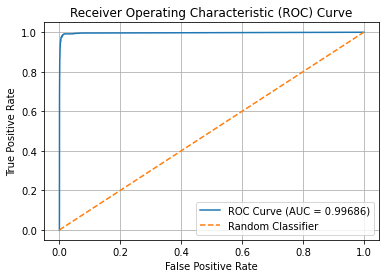

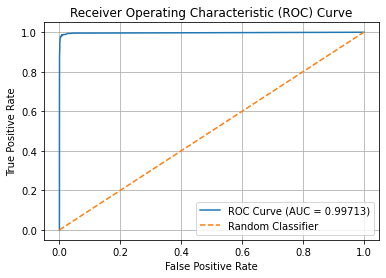

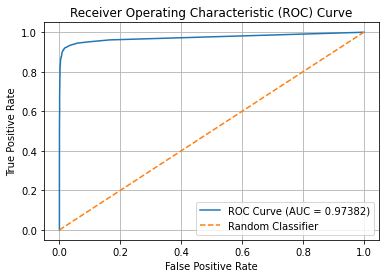

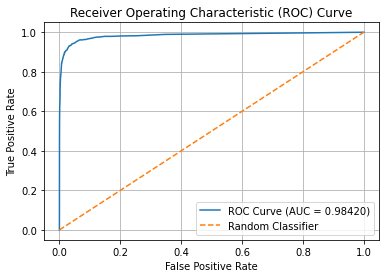

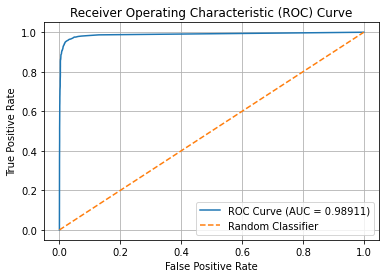

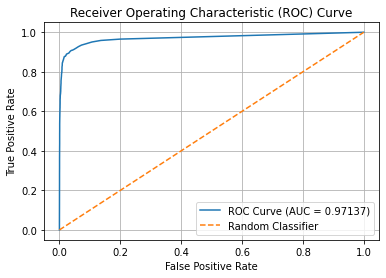

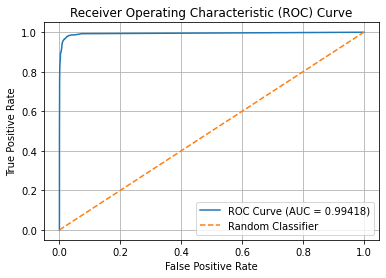

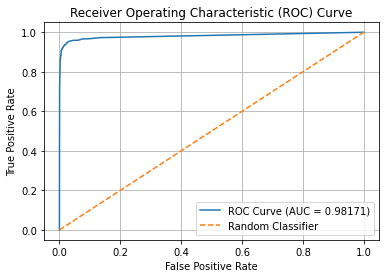

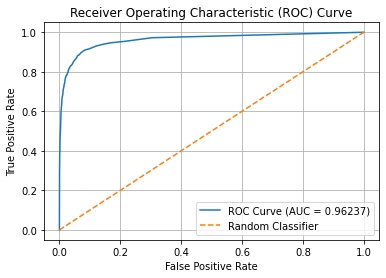

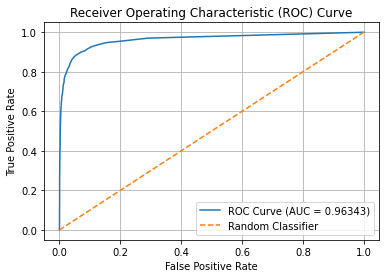

In [11]:
######### Run individual ROC curves for each of the 10 logistic regression models ##########
##
## ROC curves are only for binary classification
##
## Test ROC curves
##
############################################################################################

## ROC curve for 0 vs the rest
model_0.plot_roc_curve(X_test,y_test_0)

## ROC curve for 1 vs the rest
model_1.plot_roc_curve(X_test,y_test_1)

## ROC curve for 2 vs the rest
model_2.plot_roc_curve(X_test,y_test_2)

## ROC curve for 3 vs the rest
model_3.plot_roc_curve(X_test,y_test_3)

## ROC curve for 4 vs the rest
model_4.plot_roc_curve(X_test,y_test_4)

## ROC curve for 5 vs the rest
model_5.plot_roc_curve(X_test,y_test_5)

## ROC curve for 6 vs the rest
model_6.plot_roc_curve(X_test,y_test_6)

## ROC curve for 7 vs the rest
model_7.plot_roc_curve(X_test,y_test_7)

## ROC curve for 8 vs the rest
model_8.plot_roc_curve(X_test,y_test_8)

## ROC curve for 9 vs the rest
model_9.plot_roc_curve(X_test,y_test_9)
